# Diabetes Decision Tree

##### Import Dependencies

In [15]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

c:\python3.700\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


###### Fetching Data

In [16]:
df = pd.read_csv('diabetes.csv')

In [20]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


###### Analyzing Data

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
# Number of people to examine
print("No. of people to examine :" +str(len(df.index)))

No. of people to examine :768


<AxesSubplot:xlabel='Outcome', ylabel='count'>

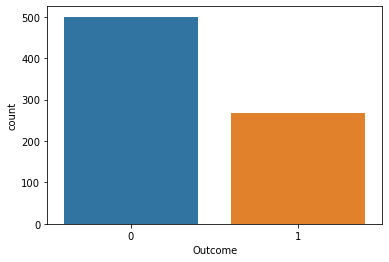

In [23]:
# Number of people which are diabetes patient = 1 or not = 0
sns.countplot(x="Outcome", data = df)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

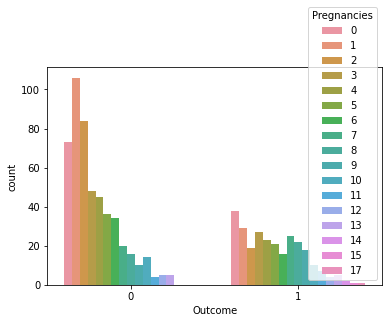

In [28]:
# Number of diabetic pateint which are pregnant
sns.countplot(x="Outcome", data = df, hue = "Pregnancies")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Wrangling

###### - Clean the data by removing Non values and unnecessary columns in the dataset

In [35]:
df.isnull() # This checks the missing data in the dataset
# Below False = Non null and True = Non null

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [36]:
# Get the number of null values in particular data set
df.isnull().sum()
# From below we can say that there is no null attribute in data set

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

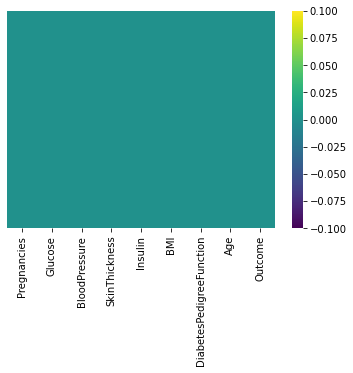

In [37]:
# Heat map of the number of null values in particular data set
sns.heatmap(df.isnull(), yticklabels= False, cmap="viridis")
# From below we can say that there is no null attribute in data set

### Train & Test Data


###### - Build the model on the train data and predict the output on the test data

In [38]:
# Here we will consider Label or Target as Outcome(Diabetic) or not,
# And all other attributes as features
X = df.drop("Outcome", axis= 1) #Here we will take every attribute except "Survived"
y = df["Outcome"] # Target Attribute

In [39]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [40]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

###### Splitting dataset

In [42]:
# Splitting as test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Train and test dataset

In [44]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [48]:
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

In [49]:
# Predict the responses for test dataset
y_pred = clf.predict(X_test)

### Model Accuracy

In [51]:
print("Accuracy is : ",metrics.accuracy_score(y_test,y_pred))

Accuracy is :  0.7662337662337663


###### Accuracy Measurement

In [52]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)
# To determine precision recall and f1- score

'              precision    recall  f1-score   support\n\n           0       0.81      0.84      0.82        99\n           1       0.69      0.64      0.66        55\n\n    accuracy                           0.77       154\n   macro avg       0.75      0.74      0.74       154\nweighted avg       0.76      0.77      0.76       154\n'

###### Confusion Matrix

In [53]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[83, 16],
       [20, 35]], dtype=int64)